## Name - Shivam Kumar Mishra 

### TASK1- Predict the percentage of marks of an student based on the number of study hours 

### Importing the libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [54]:
url = "http://bit.ly/w-data"

In [55]:
df = pd.read_csv(url)

In [56]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [59]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualisation

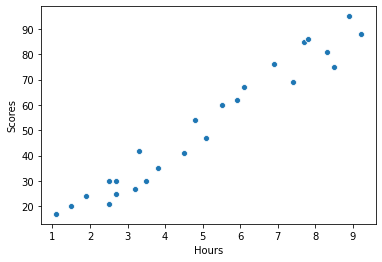

In [70]:
sns.scatterplot('Hours','Scores',data=df)

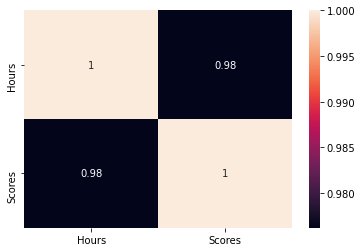

In [71]:
sns.heatmap(df.corr(),annot= True)

## Splitting the data set into train set and test set

In [72]:
X =  df.iloc[:,:-1].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

### Training the model using linear regression

In [66]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)

LinearRegression()

### Accuracy of training set & test set

In [75]:
train_score = Regressor.score(X_train, y_train)
test_score = Regressor.score(X_test, y_test)
print(train_score)
print(test_score)


0.9484509249326872
0.9367661043365055


In [76]:
y_pred = Regressor.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[16.84, 20.  ],
       [33.75, 27.  ],
       [75.5 , 69.  ],
       [26.79, 30.  ],
       [60.59, 62.  ],
       [39.71, 35.  ],
       [20.82, 24.  ]])

###  Predicted score if a student studies for 9.25 hrs/ day?  

In [82]:
Student_score = Regressor.predict([[9.25]])
print("Score of student who studied 9.25hours/Day =" ,Student_score)

Score of student who studied 9.25hours/Day = [93.89]


In [85]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

20.33292367497997


0.9367661043365055